In [14]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

from jupyterthemes import jtplot
jtplot.style(theme='onedork', figsize=(20,10))
plt.style.use('tableau-colorblind10')

In [2]:
df = pd.read_feather('data/train.feather')

In [3]:
OPS = ['mean', 'median', 'std']

def aggregate(data, time_slice, sample=None):
    if sample is not None:
        data = data.sample(sample)
    return (data.groupby(pd.Grouper(key='pickup_datetime', freq=time_slice))
             .fare_amount
             .agg(OPS)
             .rename(columns={col: '-'.join((col, time_slice)) for col in OPS})) 

In [4]:
%%time
SAMPLE = int(1e6)
TIME_SLICES = ['1M', '1W', '1D', '12H', '6H', '3H', '1H']
grouped = {t: aggregate(df, t, SAMPLE) for t in TIME_SLICES}

CPU times: user 28.8 s, sys: 1.66 s, total: 30.4 s
Wall time: 30.8 s


Text(0,0.5,'Price ($)')

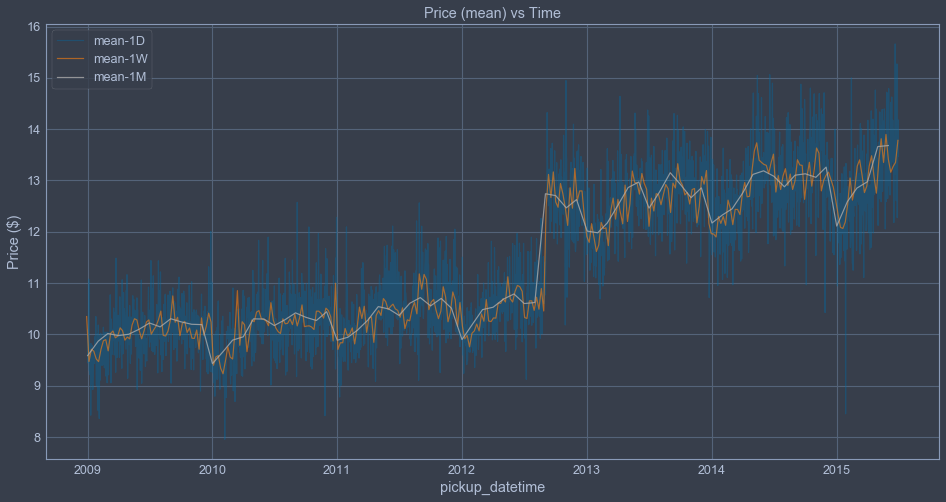

In [15]:
ax = plt.axes()

# skipping hour scale for now
not_hour = set(filter(lambda c: 'H' not in c, TIME_SLICES))
alpha_step = 0.2
alpha = 1 - (len(not_hour) * alpha_step)

for scale, aggs in reversed(list(grouped.items())):
    # skip hour scale for now
    if scale in not_hour:
        cols = [c for c in aggs.columns if 'mean' in c]
        aggs[cols].plot(ax=ax, alpha=alpha)
        # make it more subtle as the scale gets smaller
        alpha += alpha_step
plt.title('Price (mean) vs Time')
plt.ylabel('Price ($)')

In [6]:
df['hour'] = df.pickup_datetime.dt.hour
df['dow'] = df.pickup_datetime.dt.dayofweek

(0, 24)

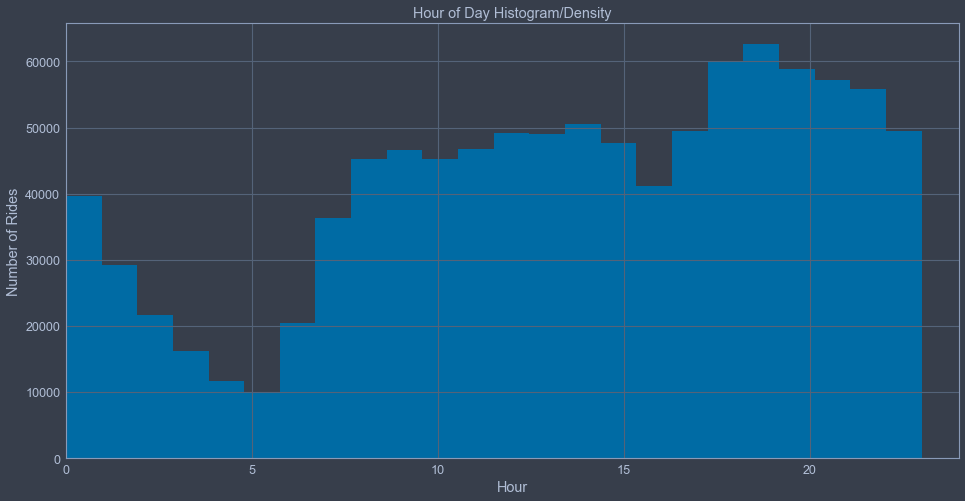

In [21]:
sampled = df.sample(SAMPLE)
sampled.hour.plot.hist(bins=24)
plt.title('Hour of Day Histogram/Density')
plt.xlabel('Hour')
plt.ylabel('Number of Rides')
plt.xlim(0,24)

In [24]:
def plot_by_dt(unit):
    agg = (df.sample(SAMPLE)
       .groupby(unit)
       .fare_amount
       .agg(OPS))

    (agg[['mean']]
        .plot
        .bar(yerr=agg['std']))
    plt.title('Price (mean) vs {} w/Error Bars'.format(unit))
    plt.ylabel('Price ($)')

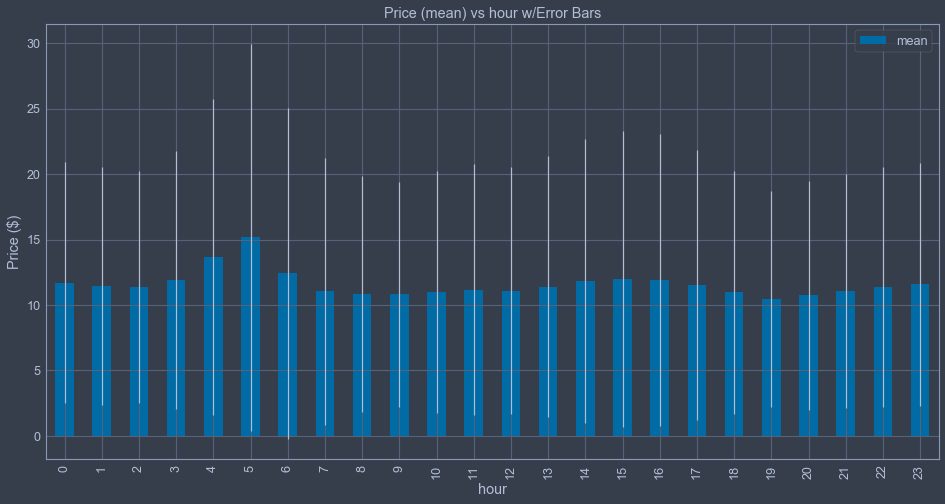

In [25]:
plot_by_dt('hour')

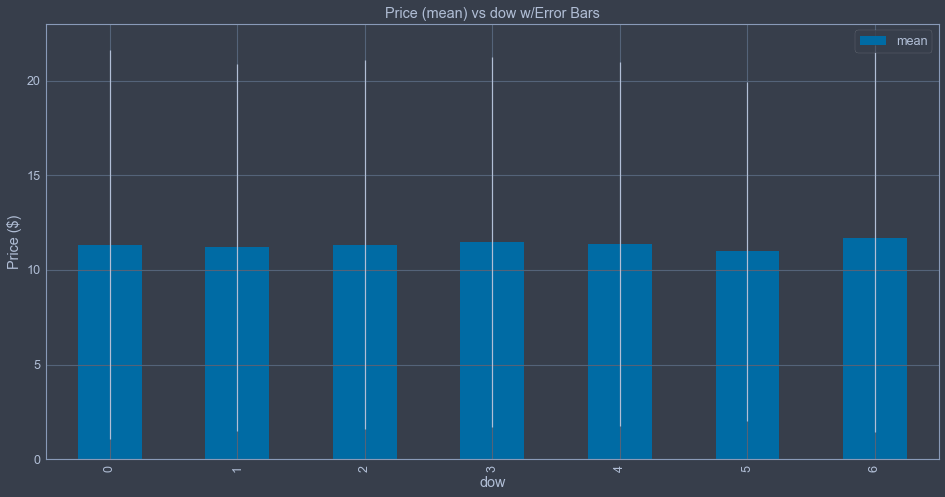

In [26]:
plot_by_dt('dow')